# PUBG_Modeling_PJT
- WHAT IS GOAL? -> 사용자가 몇 등을 할 것인 예측하는 것

- 6/7 ~ 6/8 EDA 작업


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import matplotlib.dates as mdates

pd.set_option('display.max_columns',None)

In [2]:
# df = pd.read_csv("/Users/krc/Downloads/pubg-finish-placement-prediction/train_V2.csv")
df = pd.read_csv("/Users/krc/Desktop/modeling_pjt/pjt_df1.csv",index_col=0)

In [3]:
# df[df['winPlacePerc'].isna()]
# #2744604 탈주닌자로 예상 drop

In [4]:
# df.drop(index=2744604, axis=0, inplace = True)
# df.drop(columns='Id',inplace = True)
# df.drop(columns = 'groupId', inplace = True)
# df.drop(columns= 'matchId',inplace = True)
# df

In [5]:
df


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [76]:
df.corr()**2 


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.094669,0.165426,0.090635,0.039319,0.052238,0.084136,0.001526,0.102202,0.059278,0.068343,0.000378,0.021879,0.021552,2.691830e-04,3.933100e-02,0.012242,0.000142,0.000546,0.000037,0.003355,0.084277,0.059478,0.000577,0.089665
boosts,0.094669,1.000000,0.272429,0.128814,0.111998,0.287139,0.307852,0.000070,0.252028,0.164290,0.179175,0.005199,0.000187,0.000167,5.383254e-04,6.407207e-02,0.108146,0.001234,0.011662,0.000171,0.007636,0.409792,0.165331,0.000058,0.402253
damageDealt,0.165426,0.272429,1.000000,0.541347,0.376271,0.117640,0.458868,0.002490,0.789936,0.495052,0.317912,0.000046,0.001657,0.001606,2.130035e-06,6.602378e-02,0.019848,0.002755,0.001349,0.000239,0.006590,0.158562,0.124784,0.000315,0.194046
DBNOs,0.090635,0.128814,0.541347,1.000000,0.220828,0.070482,0.308347,0.001816,0.501049,0.418444,0.203781,0.000210,0.071668,0.070644,1.190936e-05,9.060015e-02,0.010514,0.001303,0.000300,0.004821,0.003625,0.081031,0.047594,0.000123,0.078383
headshotKills,0.039319,0.111998,0.376271,0.220828,1.000000,0.039967,0.220739,0.000575,0.454647,0.263048,0.200042,0.000312,0.000085,0.000088,2.619939e-05,2.254354e-02,0.005851,0.000179,0.000814,0.000075,0.001537,0.062992,0.047329,0.000025,0.077130
heals,0.052238,0.287139,0.117640,0.070482,0.039967,1.000000,0.149021,0.000007,0.097207,0.073123,0.069315,0.011859,0.004194,0.004122,3.664117e-04,5.601744e-02,0.088497,0.000606,0.006334,0.001252,0.003953,0.185128,0.095525,0.000121,0.183062
killPlace,0.084136,0.307852,0.458868,0.308347,0.220739,0.149021,1.000000,0.000542,0.533628,0.656938,0.292839,0.000034,0.000282,0.000353,2.191785e-04,7.279424e-02,0.055791,0.003290,0.007992,0.001429,0.005412,0.348379,0.240241,0.000006,0.517060
killPoints,0.001526,0.000070,0.002490,0.001816,0.000575,0.000007,0.000542,1.000000,0.001310,0.001376,0.000198,0.009909,0.002007,0.001795,9.517076e-01,1.449744e-04,0.000859,0.000017,0.000021,0.001579,0.000093,0.000021,0.000016,0.967108,0.000167
kills,0.102202,0.252028,0.789936,0.501049,0.454647,0.097207,0.533628,0.001310,1.000000,0.644006,0.363532,0.000942,0.000023,0.000016,6.723233e-05,6.417263e-02,0.013167,0.004051,0.001531,0.000310,0.006399,0.140456,0.113175,0.000048,0.176329
killStreaks,0.059278,0.164290,0.495052,0.418444,0.263048,0.073123,0.656938,0.001376,0.644006,1.000000,0.265325,0.001200,0.001394,0.001300,1.173992e-05,5.841652e-02,0.009686,0.004300,0.001196,0.000762,0.004144,0.107347,0.075830,0.000073,0.142556


#### 결정계수가 0.1 이상인 column
- **assists, boosts,heals, killPlace!, kills(?), killstreak, longestkill, rideDistance, walkDistance, weaponAcquired**

#### 결정계수가  0.1보다 작지만 영향이 있을거라고 생각되는 부분
- **DBNOS,headshot**

#### MatchType

In [7]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [8]:
df.groupby('matchType').mean().sort_values(by='winPlacePerc',ascending=False)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchType,,,,,,,,,,,,,,,,,,,,,,,,,
normal-solo,1.745399,0.809816,799.843804,0.000000,1.920245,2.466258,10.684049,677.914110,7.509202,1.377301,83.867813,1199.855828,18.751534,13.107362,482.450920,0.000000,399.189390,0.000000,1.980368,0.073620,0.000000,939.345172,18.279141,1016.871166,0.561912
normal-solo-fpp,1.918549,0.720571,774.542390,0.000000,1.954221,2.377527,12.335315,464.328181,7.473841,1.414982,60.387529,1008.514863,21.344828,15.850773,803.055291,0.000000,417.972398,0.001784,3.996410,0.036266,0.001189,825.591839,17.370987,696.492271,0.554327
normal-squad,1.585271,0.949612,546.821300,1.666667,1.569767,2.263566,23.486434,281.007752,5.019380,1.209302,68.875973,1315.275194,11.147287,11.091085,1078.207364,0.257752,752.076473,0.025194,5.867281,0.067829,0.009690,962.475871,12.982558,421.511628,0.524561
normal-duo,1.155779,1.075377,441.994427,2.457286,0.924623,2.758794,10.713568,663.316583,3.829146,0.944724,53.324189,1272.507538,10.432161,10.241206,504.422111,0.371859,1351.141709,0.030151,0.937136,0.035176,0.020101,1212.131744,10.633166,994.974874,0.514656
normal-duo-fpp,0.609583,1.688832,253.990259,0.877209,0.472946,2.305338,25.502459,673.346693,1.956094,0.682456,38.635432,1704.422481,25.862088,25.682091,489.309346,0.177446,1757.459888,0.009656,7.500335,0.021133,0.017672,1618.029235,6.672254,1010.020040,0.508175
normal-squad-fpp,1.172295,1.425178,387.022061,1.611913,0.756667,2.965704,28.636660,424.245953,3.122569,0.955398,59.182296,1517.550949,12.899965,12.686561,863.223361,0.301502,2157.199776,0.003261,3.886634,0.056655,0.034121,1346.069685,9.051357,636.368930,0.502411
solo-fpp,0.057640,1.058980,118.918804,0.000000,0.251553,1.009678,48.025596,460.651884,0.934731,0.482457,21.701100,1577.081990,95.051192,92.696308,963.338642,0.000000,403.209692,0.003488,4.824648,0.010183,0.003499,945.309091,3.486528,563.691406,0.491835
duo-fpp,0.215806,1.078022,132.249549,0.628594,0.225009,1.328823,47.638865,485.647968,0.926086,0.566743,22.375703,1578.642465,47.719569,46.018668,918.925386,0.161866,546.374125,0.002020,4.178059,0.019369,0.005852,1104.370561,3.564324,592.193722,0.485801
crashtpp,0.242588,1.105121,101.932507,0.479784,0.056604,0.940701,38.417790,0.000000,0.881402,0.576819,5.540457,897.873315,38.862534,36.822102,1500.000000,0.029650,1302.812062,0.366577,0.294717,0.037736,0.067385,724.213005,1.665768,0.000000,0.484515


In [85]:
df['matchType'].value_counts()
# one-hot incoding

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

# Kill

In [34]:
kill = df[['kills','teamKills','roadKills','longestKill','weaponsAcquired','killStreaks','headshotKills','DBNOs','damageDealt','winPlacePerc']]
# 킬 & 데미지"
kill.describe()

,kills,teamKills,roadKills,longestKill,weaponsAcquired,killStreaks,headshotKills,DBNOs,damageDealt,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,9.247835e-01,2.386841e-02,3.496092e-03,2.299760e+01,3.660488e+00,5.439553e-01,2.268196e-01,6.578757e-01,1.307172e+02,4.728216e-01
std,1.558445e+00,1.673935e-01,7.337297e-02,5.097262e+01,2.456543e+00,7.109721e-01,6.021553e-01,1.145743e+00,1.707806e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.424000e+01,4.583000e-01
75%,1.000000e+00,0.000000e+00,0.000000e+00,2.132000e+01,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.860000e+02,7.407000e-01
max,7.200000e+01,1.200000e+01,1.800000e+01,1.094000e+03,2.360000e+02,2.000000e+01,6.400000e+01,5.300000e+01,6.616000e+03,1.000000e+00


In [35]:
kill

,kills,teamKills,roadKills,longestKill,weaponsAcquired,killStreaks,headshotKills,DBNOs,damageDealt,winPlacePerc
0,0,0,0,0.00,1,0,0,0,0.00,0.4444
1,0,0,0,0.00,5,0,0,0,91.47,0.6400
2,0,0,0,0.00,2,0,0,0,68.00,0.7755
3,0,0,0,0.00,3,0,0,0,32.90,0.1667
4,1,0,0,58.53,2,1,0,0,100.00,0.1875
...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0,0.00,3,0,0,0,0.00,0.1786
4446962,0,0,0,0.00,6,0,0,0,44.15,0.2935
4446963,0,0,0,0.00,4,0,0,0,59.06,0.4815
4446964,2,0,0,98.50,8,1,1,1,180.40,0.8000


<AxesSubplot:>

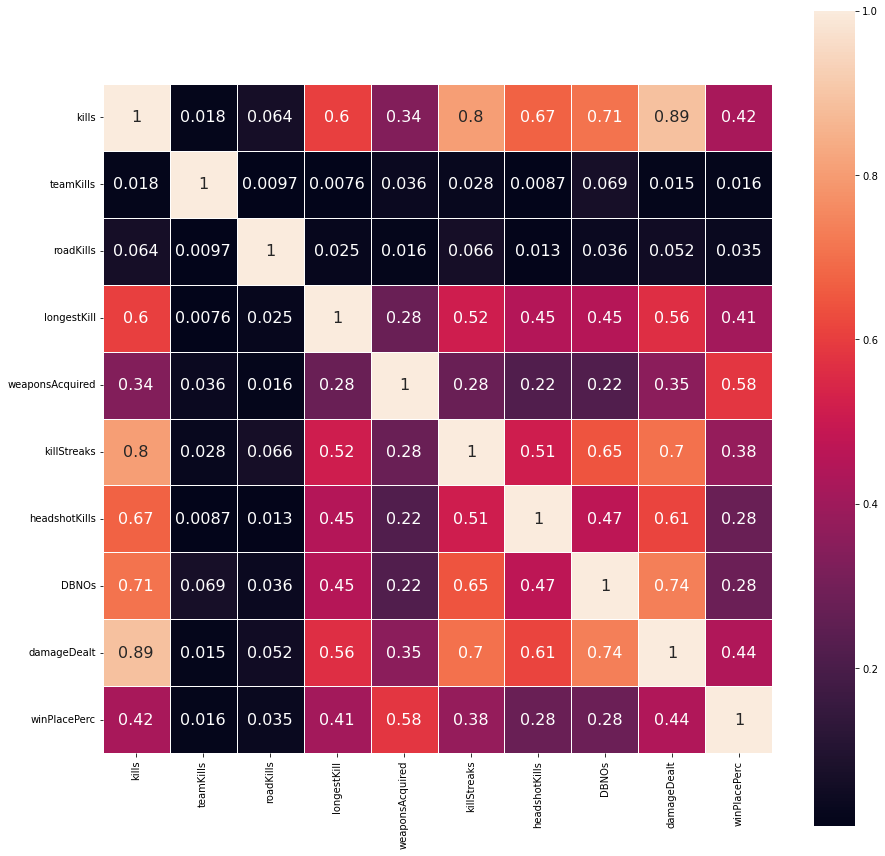

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(kill.corr(), linewidths = 1.0, vmax = 1.0,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 16})


### kill 결정계수

In [72]:
kill.corr()**2

,kills,teamKills,roadKills,longestKill,weaponsAcquired,killStreaks,headshotKills,DBNOs,damageDealt,winPlacePerc
kills,1.000000,0.000310,0.004051,0.363532,0.113175,0.644006,0.454647,0.501049,0.789936,0.176329
teamKills,0.000310,1.000000,0.000094,0.000058,0.001290,0.000762,0.000075,0.004821,0.000239,0.000254
roadKills,0.004051,0.000094,1.000000,0.000636,0.000272,0.004300,0.000179,0.001303,0.002755,0.001193
longestKill,0.363532,0.000058,0.000636,1.000000,0.076322,0.265325,0.200042,0.203781,0.317912,0.168226
weaponsAcquired,0.113175,0.001290,0.000272,0.076322,1.000000,0.075830,0.047329,0.047594,0.124784,0.340830
killStreaks,0.644006,0.000762,0.004300,0.265325,0.075830,1.000000,0.263048,0.418444,0.495052,0.142556
headshotKills,0.454647,0.000075,0.000179,0.200042,0.047329,0.263048,1.000000,0.220828,0.376271,0.077130
DBNOs,0.501049,0.004821,0.001303,0.203781,0.047594,0.418444,0.220828,1.000000,0.541347,0.078383
damageDealt,0.789936,0.000239,0.002755,0.317912,0.124784,0.495052,0.376271,0.541347,1.000000,0.194046
winPlacePerc,0.176329,0.000254,0.001193,0.168226,0.340830,0.142556,0.077130,0.078383,0.194046,1.000000


#### DamgeDealt ( v )

<AxesSubplot:xlabel='winPlacePerc', ylabel='damageDealt'>

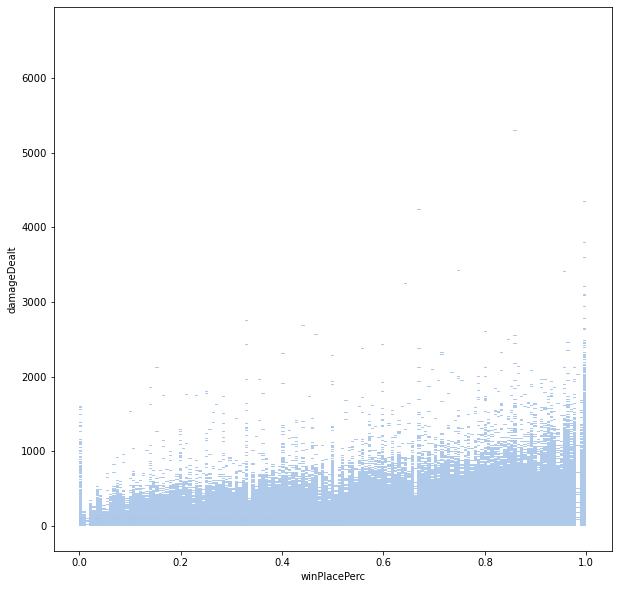

In [93]:
plt.figure(figsize=(10,10))
sns.set_palette('pastel')
sns.histplot(y= kill['damageDealt'], x= kill['winPlacePerc'],data=kill)

#### longestKill ( v )

<AxesSubplot:xlabel='winPlacePerc', ylabel='longestKill'>

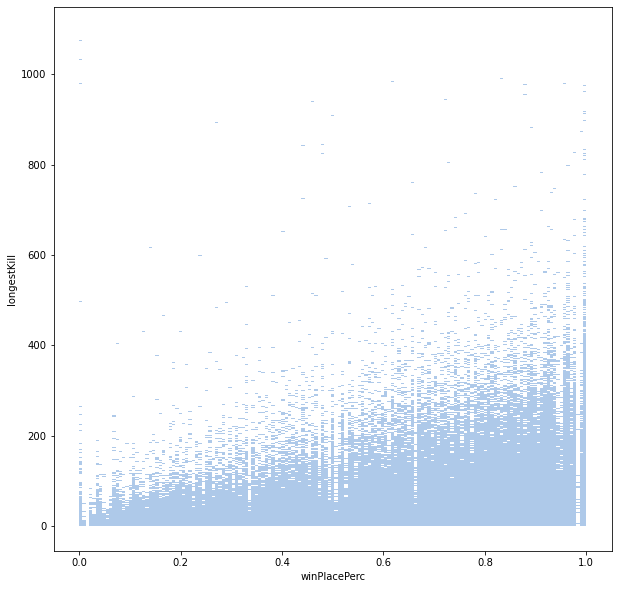

In [94]:
plt.figure(figsize=(10,10))
sns.set_palette('pastel')
sns.histplot(y= kill['longestKill'], x= kill['winPlacePerc'],data=kill)

#### kills ( v )

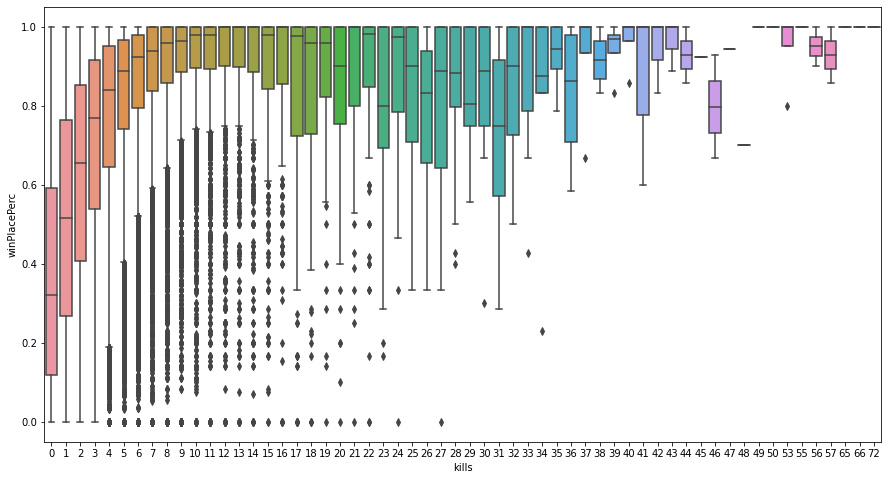

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x="kills", y="winPlacePerc", data=kill)
plt.show()

#### killstreaks ( ? ) New

- 중앙값은 많은 반면 편차가 큰 편이기도 함

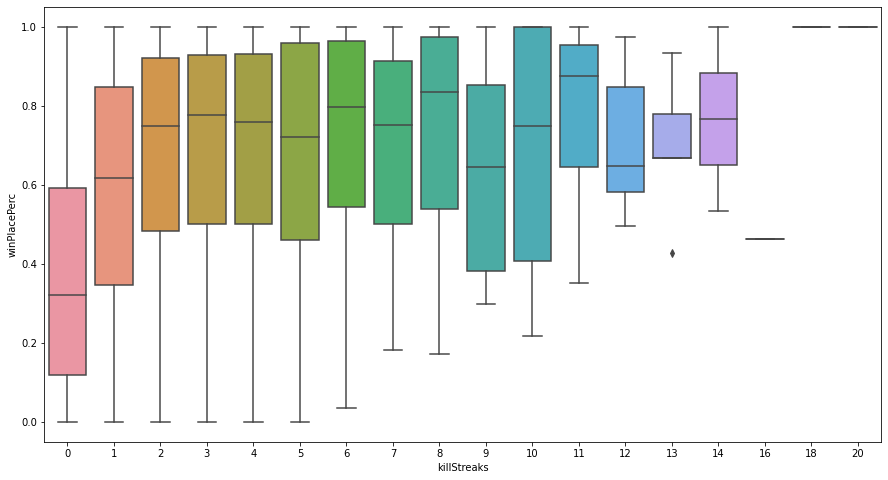

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x="killStreaks", y="winPlacePerc", data=kill)
plt.show()

In [125]:
kill['killStreaks'].value_counts()

0     2529721
1     1475558
2      389346
3       45958
4        5711
5         409
6         126
7          54
8          32
9          18
10          9
11          8
13          5
12          5
14          2
16          1
18          1
20          1
Name: killStreaks, dtype: int64

<AxesSubplot:xlabel='killStreaks', ylabel='winPlacePerc'>

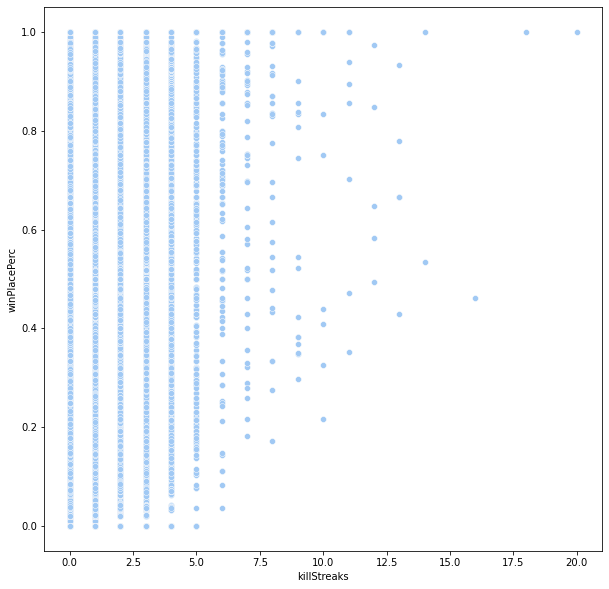

In [130]:
plt.figure(figsize=(10,10))
sns.set_palette('pastel')
sns.scatterplot(x= kill['killStreaks'], y= kill['winPlacePerc'],data=kill)

<AxesSubplot:xlabel='killStreaks', ylabel='winPlacePerc'>

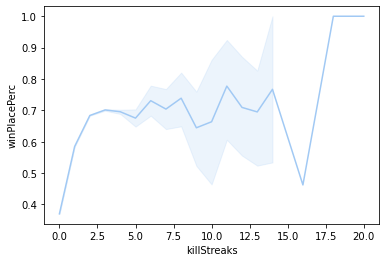

In [132]:
sns.lineplot(x='killStreaks',y='winPlacePerc',data=kill)

#### weaponAcquired ( v )

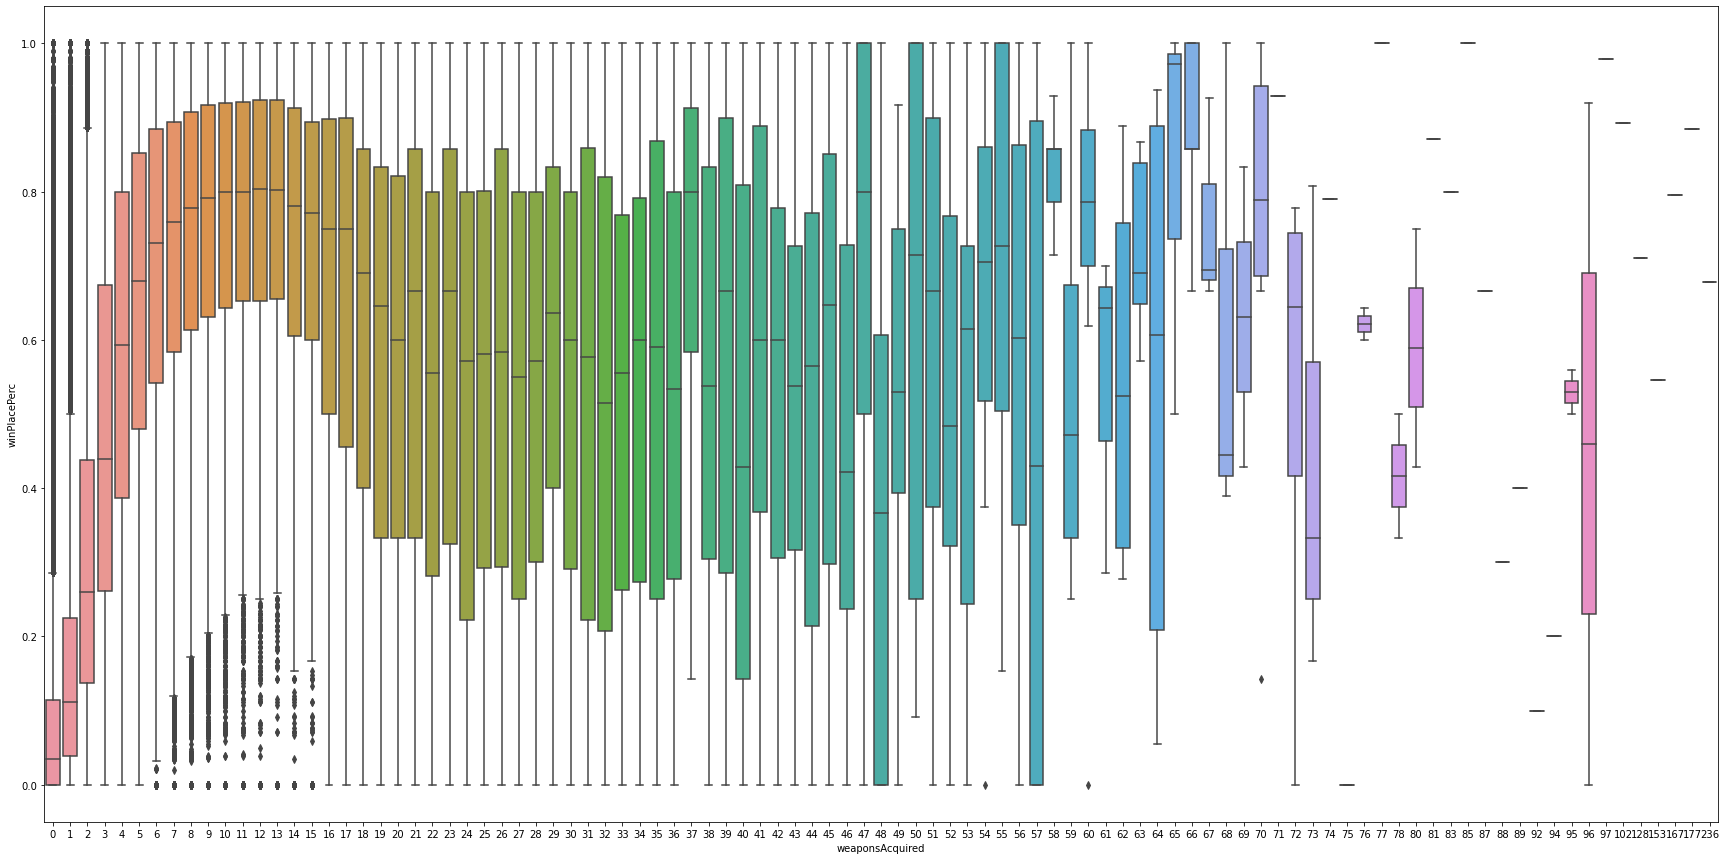

In [40]:
plt.figure(figsize=(30,15))
sns.boxplot(x="weaponsAcquired", y="winPlacePerc", data=kill)
plt.show()

In [53]:
kill['weaponsAcquired'].mean()

3.6604884454903512

In [49]:
wea = kill['weaponsAcquired'].unique()
wea
#236

array([  1,   5,   2,   3,   6,   4,   9,   7,   0,   8,  11,  10,  13,
        14,  43,  15,  12,  28,  16,  21,  22,  18,  25,  26,  19,  24,
        23,  20,  17,  30,  36,  38,  34,  46,  33,  29,  50,  52,  37,
        48,  27,  41,  44,  45,  61,  42,  39,  63,  71,  31,  35,  59,
        55,  72,  32,  67,  40,  49, 128,  53,  47,  56,  60,  70,  51,
        80,  64,  62,  65,  66,  54,  68,  77,  69, 102,  95,  83,  94,
        78,  96,  57,  76, 167, 177, 153,  75,  87,  85, 236,  58,  74,
        88,  73,  81,  97,  89,  92])

In [52]:
wea1=kill['weaponsAcquired'].value_counts()
wea1.head(30)

2     768836
3     768347
4     689622
1     580951
5     540721
6     369549
7     226776
0     226577
8     128698
9      68479
10     35642
11     18022
12      9388
13      4707
14      2831
15      1414
16      1088
18       640
17       622
20       491
19       402
22       331
21       322
24       306
26       214
23       212
25       192
28       177
27       136
30       128
Name: weaponsAcquired, dtype: int64

#### headshotkills ( ? ) New

- 해당 feature도 우상향하는 것을 보이지만, winPlaceperc를 예측하기에는 아웃라이어 값들이 많이 존재하기에 
  논의가 필요해보임

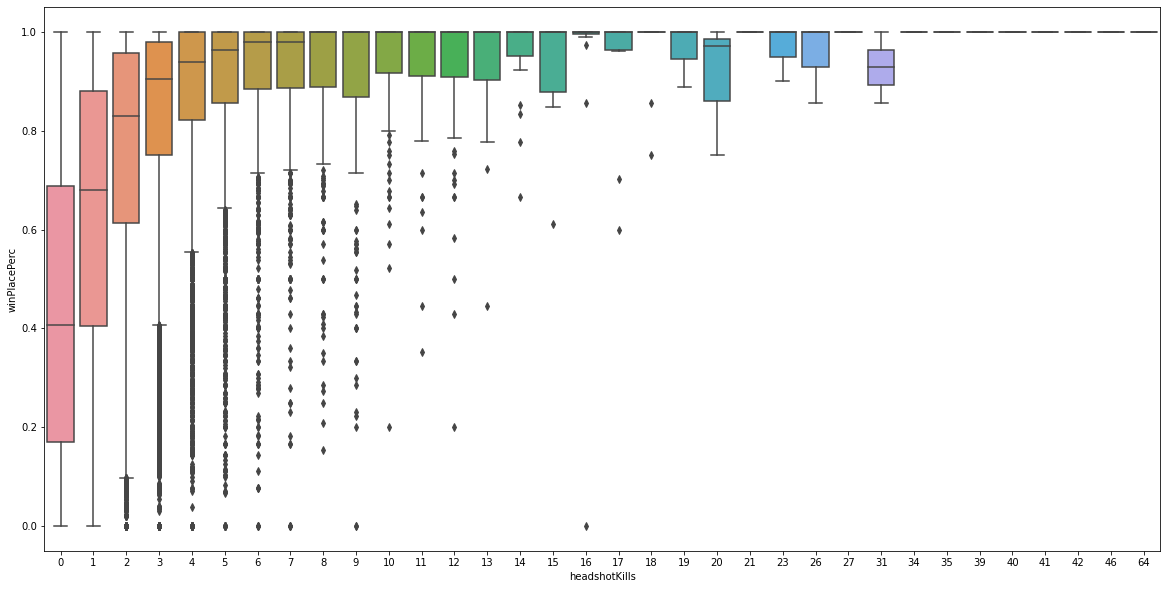

In [118]:
plt.figure(figsize=(20,10))
sns.boxplot(x="headshotKills", y="winPlacePerc", data=kill)
plt.show()

<AxesSubplot:xlabel='headshotKills', ylabel='winPlacePerc'>

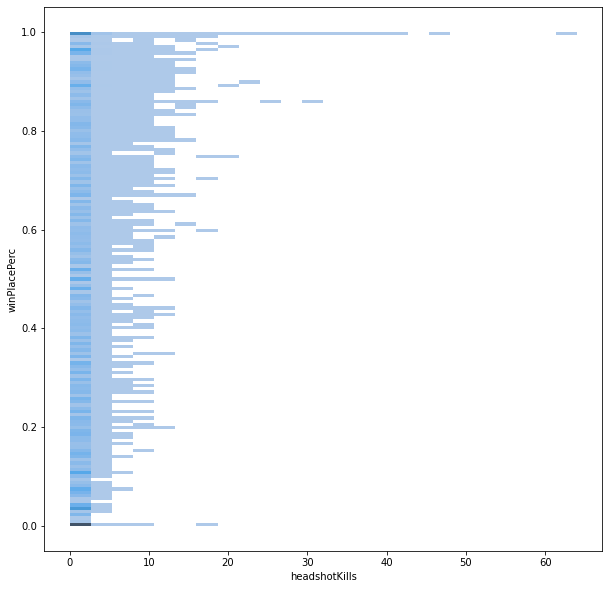

In [121]:
plt.figure(figsize=(10,10))
sns.histplot(x= kill['headshotKills'], y= kill['winPlacePerc'],data=kill)

<AxesSubplot:xlabel='headshotKills', ylabel='winPlacePerc'>

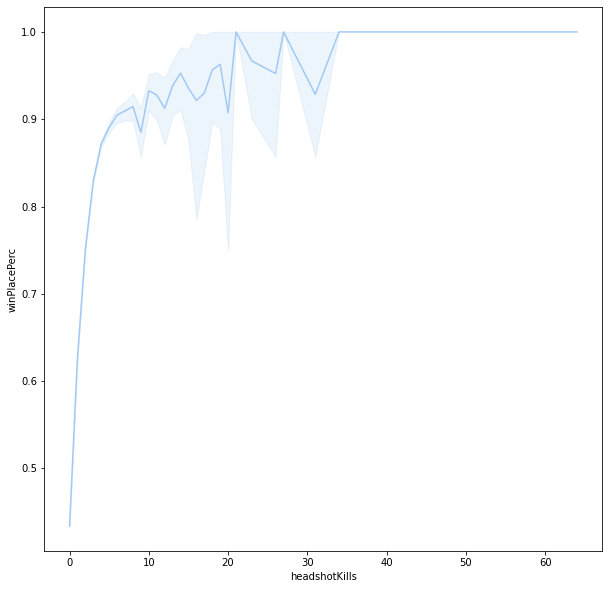

In [135]:
plt.figure(figsize=(10,10))
sns.lineplot(x='headshotKills',y='winPlacePerc',data=kill)

# Heal

In [54]:
heal=df[['boosts','heals','revives','matchDuration','winPlacePerc']]
# 회복 아이템
heal.mean()

boosts              1.106908
heals               1.370148
revives             0.164659
matchDuration    1579.506793
winPlacePerc        0.472822
dtype: float64

<AxesSubplot:>

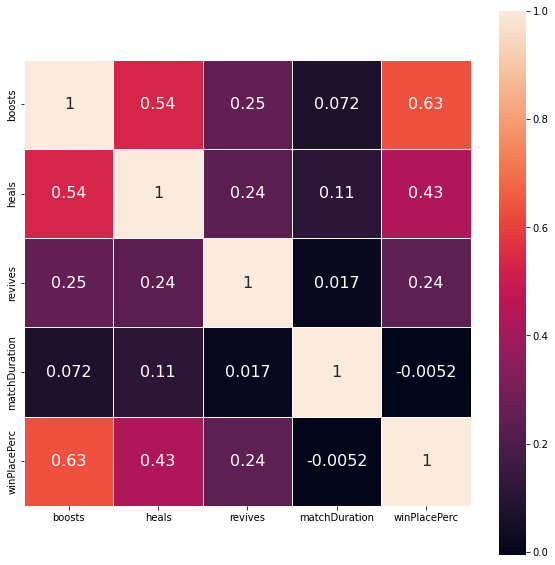

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(heal.corr(), linewidths = 1.0, vmax = 1.0,
           square = True,  linecolor = "white", annot = True, annot_kws = {"size" : 16})


#### boosts ( v )

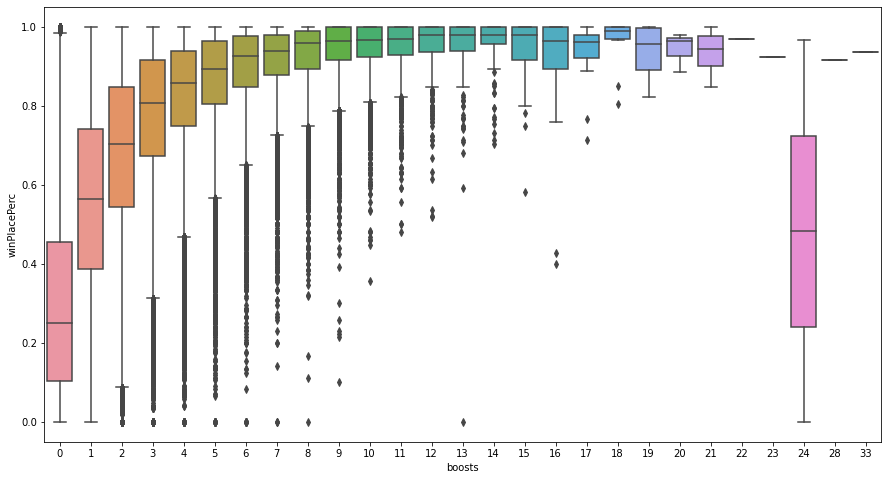

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x="boosts", y="winPlacePerc", data=heal)
plt.show()
# 부스트 아이템 사용 시 평균적으로 winplaceperc가 높아진다.


In [56]:
heal['boosts'].value_counts()

0     2521323
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
Name: boosts, dtype: int64

In [165]:
heal[heal['boosts']==24]

,boosts,heals,revives,matchDuration,winPlacePerc
1465177,24,1,0,1907,0.9663
3979434,24,1,0,1808,0.0000


In [57]:
heal['boosts'].mean()

1.1069079698176172

#### heals ( v )

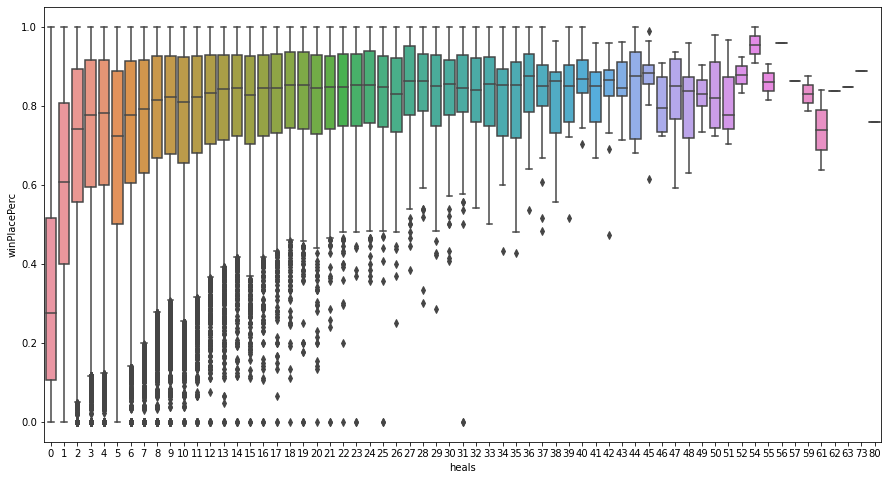

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x="heals", y="winPlacePerc", data=heal)
plt.show()
#heals 힐링 아이템 사용 시 평균적으로 winplaceperc가 높아진다.

In [64]:
heal['heals'].mean()

1.3701475050961722

In [65]:
heal['heals'].value_counts()

0     2648197
1      673077
2      319387
3      202370
4      142637
       ...   
57          1
56          1
73          1
80          1
62          1
Name: heals, Length: 63, dtype: int64

In [66]:
hea= heal['heals'].value_counts()
hea.head(30)

0     2648197
1      673077
2      319387
3      202370
4      142637
5      135242
6       88090
7       64086
8       43059
9       30043
10      25574
11      18779
12      13392
13       9794
14       7373
15       5997
16       4619
17       3434
18       2457
19       1821
20       1608
21       1288
22       1063
23        724
24        524
25        471
26        349
27        315
28        207
29        166
Name: heals, dtype: int64

#### revives 애매

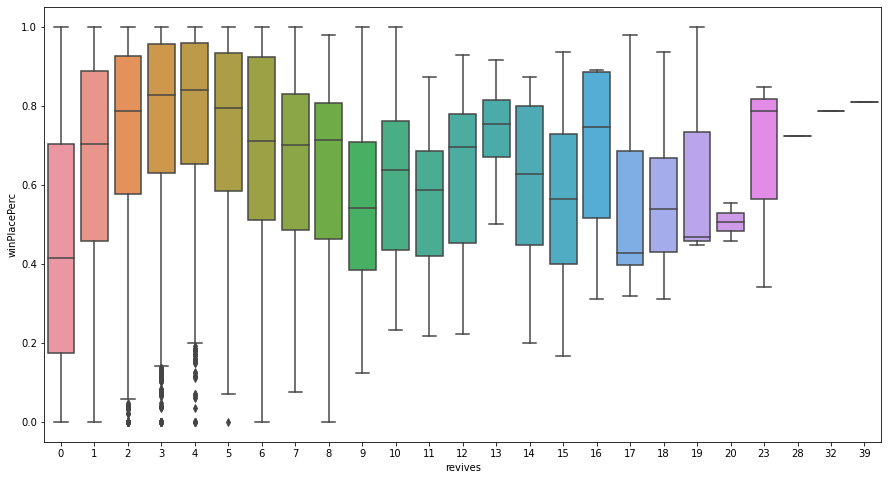

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x='revives', y="winPlacePerc", data=heal)
plt.show()
# 팀플일 경우 부활 -> 3~4번을 넘어가면 장기전으로 이어지므로 의미가 없는 것으로 보인다.

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='revives', y="winPlacePerc", data=heal)
plt.show()

In [89]:
heal['revives'].value_counts()

0     3859866
1      470110
2       95545
3       17333
4        3102
5         606
6         142
7          72
8          43
9          26
10         25
11         23
15         13
12         12
14         10
13          7
18          7
16          6
17          6
19          3
23          3
20          2
28          1
39          1
32          1
Name: revives, dtype: int64

<Figure size 1080x576 with 0 Axes>

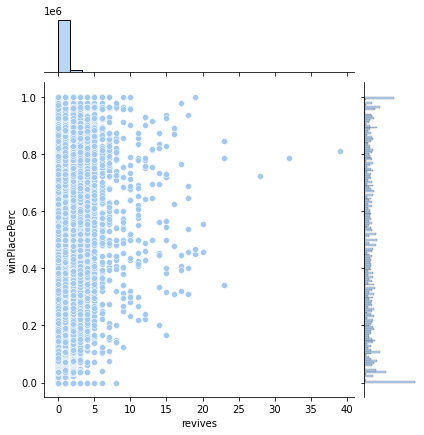

In [92]:
plt.figure(figsize=(15,8))
sns.jointplot(x= heal['revives'],y=heal['winPlacePerc'],kind='scatter',data = heal)
plt.show()

# Dist

In [166]:
dist = dist[['rideDistance','walkDistance','swimDistance','winPlacePerc']]

In [167]:
dist

,rideDistance,walkDistance,swimDistance,winPlacePerc
0,0.0000,244.80,0.000,0.4444
1,0.0045,1434.00,11.040,0.6400
2,0.0000,161.80,0.000,0.7755
3,0.0000,202.70,0.000,0.1667
4,0.0000,49.75,0.000,0.1875
...,...,...,...,...
4446961,1292.0000,1019.00,0.000,0.1786
4446962,0.0000,81.70,0.000,0.2935
4446963,0.0000,788.70,2.184,0.4815
4446964,0.0000,2748.00,0.000,0.8000


<AxesSubplot:>

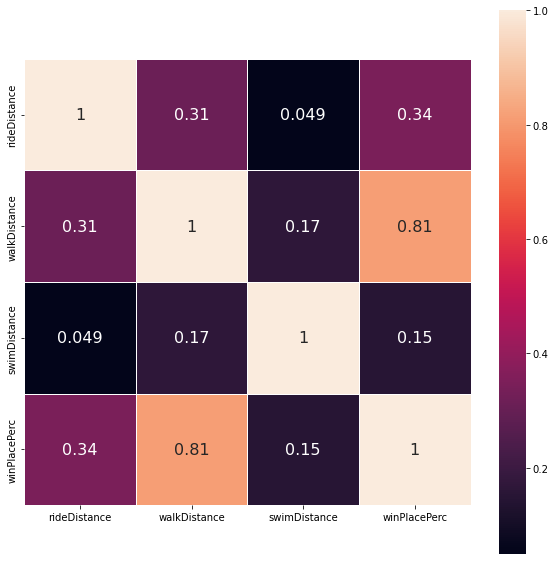

In [168]:
plt.figure(figsize=(10,10))
sns.heatmap(dist.corr(), linewidths = 1.0, vmax = 1.0,
           square = True,  linecolor = "white", annot = True, annot_kws = {"size" : 16})


#### walkDistance ( v )

#### walkDistance == 0 경우 삭제?

In [169]:
dist['walkDistance'].value_counts()

0.0000       99602
1007.0000      955
1098.0000      945
1047.0000      939
1036.0000      934
             ...  
0.8005           1
0.3570           1
7935.0000        1
0.8721           1
0.9661           1
Name: walkDistance, Length: 38599, dtype: int64

In [170]:
dist[dist['walkDistance'] == 0.0]
# walkDistance 9만개 

,rideDistance,walkDistance,swimDistance,winPlacePerc
29,0.0,0.0,0.0,0.0000
116,0.0,0.0,0.0,0.0000
151,0.0,0.0,0.0,0.0000
237,0.0,0.0,0.0,0.0000
283,0.0,0.0,0.0,0.1277
...,...,...,...,...
4446843,0.0,0.0,0.0,0.0000
4446849,0.0,0.0,0.0,0.0412
4446905,0.0,0.0,0.0,0.0417
4446926,0.0,0.0,0.0,0.0000


In [171]:
dist[(dist['walkDistance'] == 0.0) & (dist['winPlacePerc'] != 0.0)]
# 움직이지않고도 winplaceperc가 높은 경우.

,rideDistance,walkDistance,swimDistance,winPlacePerc
283,0.0,0.0,0.00,0.1277
605,0.0,0.0,48.03,0.5556
863,0.0,0.0,0.00,0.2174
1285,0.0,0.0,0.00,0.2581
1402,0.0,0.0,0.00,0.0385
...,...,...,...,...
4446464,0.0,0.0,0.00,0.0532
4446585,0.0,0.0,0.00,0.0652
4446682,0.0,0.0,0.00,0.9434
4446849,0.0,0.0,0.00,0.0412


In [172]:
dist[(dist['walkDistance'] == 0.0) & (dist['rideDistance'] == 0.0) & (dist['swimDistance'] == 0.0)]

,rideDistance,walkDistance,swimDistance,winPlacePerc
29,0.0,0.0,0.0,0.0000
116,0.0,0.0,0.0,0.0000
151,0.0,0.0,0.0,0.0000
237,0.0,0.0,0.0,0.0000
283,0.0,0.0,0.0,0.1277
...,...,...,...,...
4446843,0.0,0.0,0.0,0.0000
4446849,0.0,0.0,0.0,0.0412
4446905,0.0,0.0,0.0,0.0417
4446926,0.0,0.0,0.0,0.0000


<AxesSubplot:xlabel='walkDistance', ylabel='winPlacePerc'>

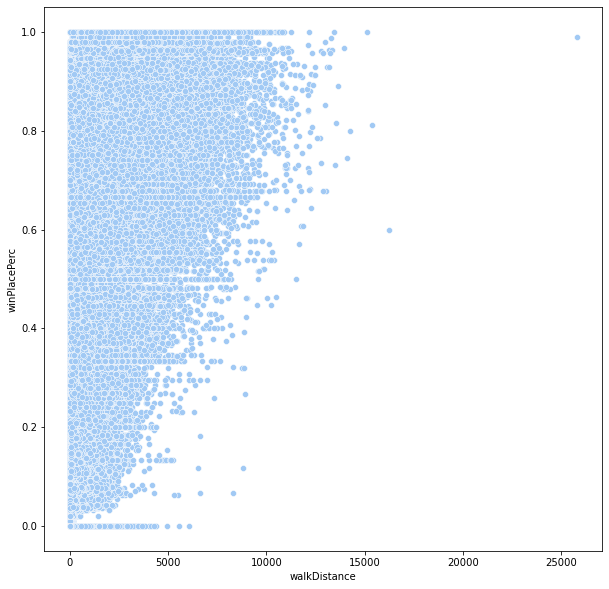

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='walkDistance',y='winPlacePerc',data=dist)

In [140]:
dist.describe()

,rideDistance,walkDistance,swimDistance,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,6.061158e+02,1.154218e+03,4.509323e+00,4.728216e-01
std,1.498344e+03,1.183497e+03,3.050220e+01,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.551000e+02,0.000000e+00,2.000000e-01
50%,0.000000e+00,6.856000e+02,0.000000e+00,4.583000e-01
75%,1.910000e-01,1.976000e+03,0.000000e+00,7.407000e-01
max,4.071000e+04,2.578000e+04,3.823000e+03,1.000000e+00


#### walkDistance 구간 별 승률 분포

In [161]:
wal_d = dist.copy()
def wal_f (x):
    if 0<= x <500:
        return("just walk")
    elif 500<= x <1000:
        return("play well")
    elif 1000<= x <2000:
        return("goinmul")
    else:
        return("Goat")

wal_d['walkDistance'] = wal_d['walkDistance'].map(wal_f)

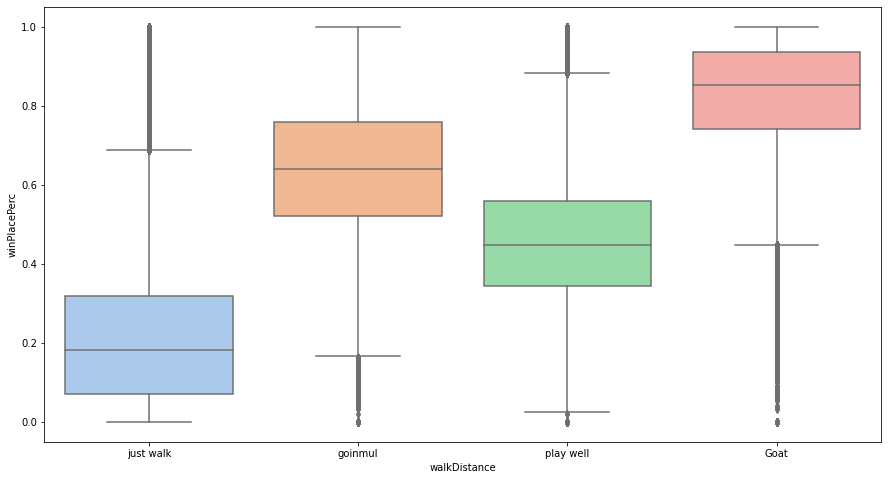

In [162]:

plt.figure(figsize=(15,8))
sns.boxplot(x="walkDistance", y="winPlacePerc", data=wal_d)
plt.show()

<AxesSubplot:xlabel='walkDistance', ylabel='count'>

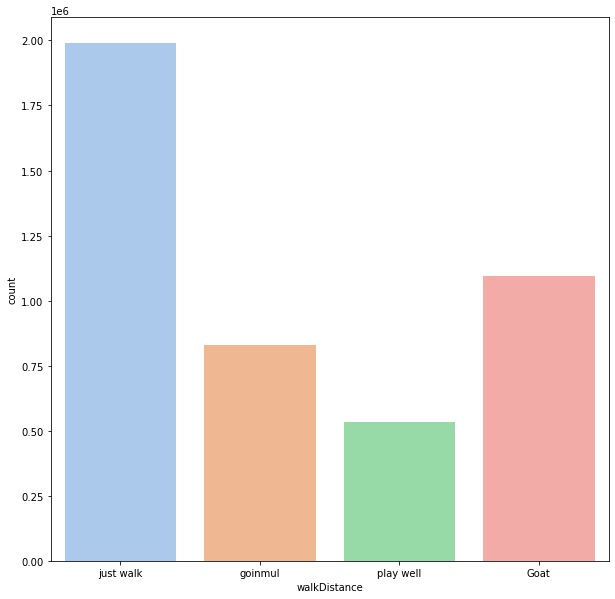

In [163]:
plt.figure(figsize=(10,10))
sns.countplot(x='walkDistance',data=wal_d)

In [139]:
pd.cut(dist['walkDistance'],5000)
#??

0            (242.332, 247.488]
1          (1433.368, 1438.524]
2            (159.836, 164.992]
3             (201.084, 206.24]
4               (46.404, 51.56]
                   ...         
4446961    (1015.732, 1020.888]
4446962         (77.34, 82.496]
4446963      (783.712, 788.868]
4446964    (2742.992, 2748.148]
4446965    (1242.596, 1247.752]
Name: walkDistance, Length: 4446965, dtype: category
Categories (5000, interval[float64, right]): [(-25.78, 5.156] < (5.156, 10.312] < (10.312, 15.468] < (15.468, 20.624] ... (25759.376, 25764.532] < (25764.532, 25769.688] < (25769.688, 25774.844] < (25774.844, 25780.0]]

#### swimDistance 
-  우상향 밀도를 보이지만 상관관계가 낮다.

<AxesSubplot:xlabel='swimDistance', ylabel='winPlacePerc'>

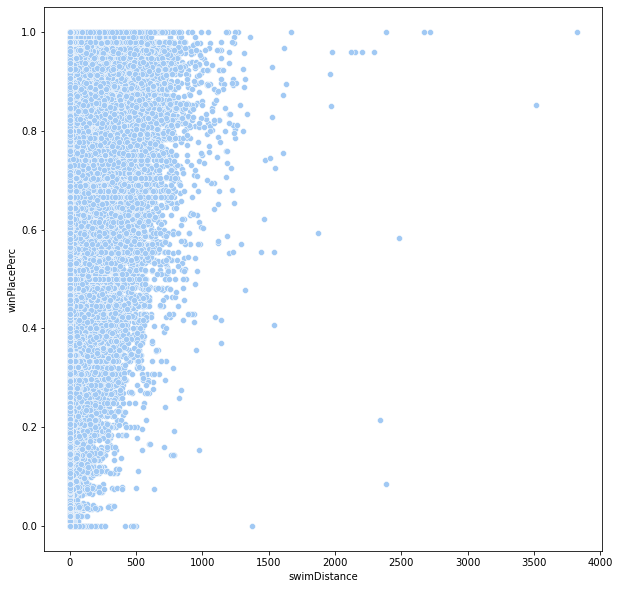

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='swimDistance',y='winPlacePerc',data=dist)

In [33]:
dist['swimDistance'].value_counts()

0.0000      4157693
102.4000        122
101.4000        104
102.8000        104
114.1000         99
             ...   
0.4356            1
0.1446            1
0.7684            1
0.7948            1
802.6000          1
Name: swimDistance, Length: 28345, dtype: int64

#### rideDistance ( v )

<AxesSubplot:xlabel='rideDistance', ylabel='winPlacePerc'>

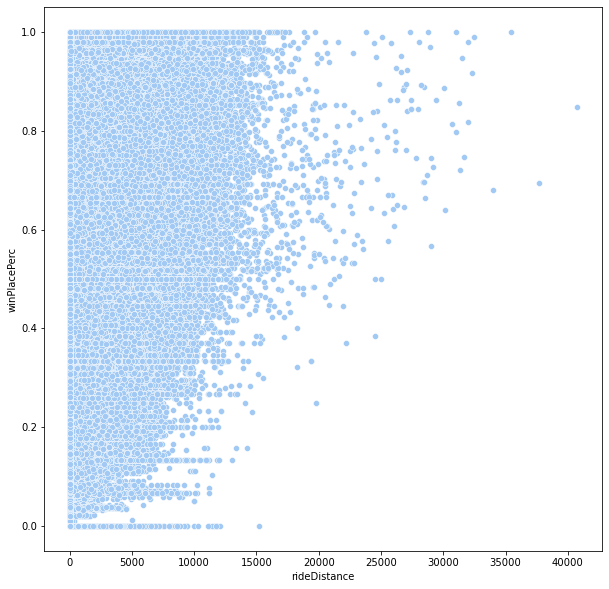

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='rideDistance',y='winPlacePerc',data=dist)